## 판다스를 활용한 실전 데이터 분석

이번 과제는 캐글의 타이타닉([Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)) 데이터를 더 깊게 분석합니다.

데이터 사이언티스트로서 데이터를 분석할 때 가장 필수적인 스킬은 판다스([Pandas](https://pandas.pydata.org/))입니다. 데이터 분석가는 언제나 주변 사람들의 요청(BI팀, CS팀 등)에 맞게 데이터를 뽑아내 그 통계치를 제공해줘야 하는데, 판다스 스킬이 부족하면 주어진 시간 내에 이를 제공해 줄 수 없습니다.

또한 스스로 데이터를 분석할 때도, 하고 싶은 실험이나 추출하고 싶은 데이터가 있는데 이를 판다스로 처리 못 하는 상황이 종종 발생합니다. (일명 '머리에 비해 손이 못 따라온다.'고 표현합니다) 이런 문제가 누적되면 다른 동료들에 비해 분석 속도나 실험 속도가 크게 뒤처질 수 밖에 없습니다.

이런 문제가 생기지 않기 위해, **모든 데이터 사이언티스트는 데이터를 능숙하게 다룰 수 있는 판다스 스킬을 필수적으로 보유하고 있어야 합니다.**

이번 노트북에는 타이타닉 데이터를 활용하여, 현업에서 충분히 발생할 만한 사례를 모아 총 19개의 문제를 만들어 보았습니다. 주어진 시간 내에 모든 문제를 해결해보세요. DS School의 내부 테스트 결과, 현업에서 데이터 사이언티스트로 일 하고 있는 분들은 아무리 늦어도 반나절(3~4시간) 내에는 모든 문제를 풀 수 있었습니다. 즉, 3시간 안에 모든 문제를 풀 수 있다면 합격입니다.

문제를 풀 때 다른 자료(DS School 입문반에서 제공한 자료, 또는 판다스 전문 서적)를 참고하거나, 구글에 검색하는 것 모두 허용합니다. (문제 중에는 구글에 검색하지 않으면 풀 수 없는 문제도 몇 개 준비해놓았습니다) 관련 자료는 [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) 를 강력 추천합니다.

또한 아래 문제를 풀면서 어려움을 느끼거나, 주어진 시간 내에 풀 수 없다는 생각이 들면 DS School의 [판다스반](https://dsschool.co.kr/suggestions)을 수강하는 것을 권장 드립니다.

In [161]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='AppleGothic')

### 데이터 읽어오기

In [162]:
# train.csv 파일을 읽어옵니다. 여기서 PassengerId라는 컬럼을 인덱스(index)로 지정한 뒤, train 변수에 할당합니다.
# 변수에 할당한 결과값을 판다스 전문 용어로 데이터프레임(DataFrame)이라고 부릅니다.
train = pd.read_csv("train.csv", index_col="PassengerId")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 출력합니다.
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 정리 + 기본 분석

**1. 타이타닉의 train 데이터에서 1) 전체 생존률과 2) 생존자의 총 인원수, 사망자의 총 인원수를 출력해주세요.**

1번(생존률)의 경우 약 38.3%가 나와야 하며, 2번(인원수)의 경우 생존자의 총 인원수는 342명, 사망자의 총 인원수는 549명이 나와야 합니다.

In [163]:
# 타이타닉의 train데이터에서 Survived 컬럼의 평균을 구합니다.
# 그 결과를 survived_rate라는 이름의 변수에 저장합니다.
survived_rate = train["Survived"].mean()

# survived_rate는 현재 0.0 ~ 1.0 사이의 값을 갖습니다.
# 하지만 퍼센티지(%)는 0 ~ 100.0 사이의 값을 가지므로, survived_rate에 100을 곱해줍니다.
survived_rate = survived_rate * 100

# survived_rate를 출력합니다. 결과는 38.4%가 나와야 합니다.
print(f"생존률 = {survived_rate:.1f}%")

생존률 = 38.4%


In [164]:
# pandas의 value_counts를 활용하여 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
# 생존자의 총 인원수(1)은 342명, 사망자의 총 인원수(0)는 549명이 나와야 합니다.
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**2. Survived 컬럼에 들어가 있는 값을 쉬운 표현으로 바꿔주세요.**

Survived 컬럼에는 0(사망)이라는 값과 1(생존)이라는 값이 있습니다. 이 표현은 직관적이지 않기 때문에, 데이터 분석을 원활하게 하기 위해서는 사람이 읽기 쉬운 표현을 쓰는 것이 좋습니다.

In [165]:
# Survived 컬럼의 상위 5개의 값을 출력합니다.
# 결과값은 0과 1이 나오는데, Survived 컬럼에 대한 사전 설명(가령 0이 어떤 값을 나타내는지, 1이 어떤 값을 나타내는지)
# 을 듣지 않으면 이 값이 어떠한 의미를 가지는지 직관적으로 이해하기 어렵습니다.
train["Survived"].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

가령 저라면 **Survived(humanized)**라는 새로운 컬럼을 만들겠습니다. 이 컬럼에는 0(사망), 1(생존)이 아닌, Perished(사망), Survived(생존)이라는 값이 들어가 있다면 좋겠습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>
<th>Survived</th>
<th>Survived(humanized)</th>
</tr>

<tr>
<th>PassengerId</th>
<th></th>
<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>
<td>0</td>
<td>Perish</td>
</tr>

<tr>
<th>2</th>
<td>1</td>
<td>Survived</td>
</tr>

<tr>
<th>3</th>
<td>1</td>
<td>Survived</td>
</tr>

<tr>
<th>4</th>
<td>1</td>
<td>Survived</td>
</tr>

<tr>
<th>5</th>
<td>0</td>
<td>Perish</td>
</tr>
</tbody>
</table>

In [166]:
# 먼저 Survived 컬럼이 0인 승객을 색인합니다. 이후 Survived(humanized)라는 이름의
# 새로운 컬럼을 만들어 여기에 Perish 라는 값을 넣습니다.
train.loc[train["Survived"] == 0, "Survived(humanized)"] = "Perished"

# 비슷하게 Survived 컬럼이 1인 승객을 찾아 Survived(humanized)에 Survived라는 값을 넣습니다.
train.loc[train["Survived"] == 1, "Survived(humanized)"] = "Survived"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# Survived 컬럼과 Survived(humanized) 컬럼 두 개를 출력하여 비교합니다.
train[["Survived", "Survived(humanized)"]].head()

(891, 12)


,Survived,Survived(humanized)
PassengerId,,
1,0,Perished
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perished


또한 이번에는 Survived 컬럼이 아닌 아닌 새롭게 만든 Survived(humanized) 컬럼으로 생존자의 총 인원수와 사망자의 총 인원수를 출력해 주세요. 앞서 사용한 ```value_counts```를 그대로 사용하면 될 것 같습니다.

In [167]:
# pandas의 value_counts를 활용하여 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
# 여기서 생존 여부는 Survived가 아닌 Survived(humanized) 컬럼을 사용합니다.
# 생존자의 총 인원수(Survived)은 342명, 사망자의 총 인원수(Perish)는 549명이 나와야 합니다.
train["Survived(humanized)"].value_counts()

Perished    549
Survived    342
Name: Survived(humanized), dtype: int64

**3. Pclass 컬럼에 들어가 있는 값을 읽기 쉬운 표현으로 바꿔주세요.**

Pclass도 마찬가지로 1, 2, 3이라는 표현은 직관적이지 않기 때문에, 사람이 이해하기 쉬운 표현으로 바꿔주고 싶습니다.

In [168]:
# pandas의 pivot_table을 활용하여 Pclass별 생존률을 출력합니다.
# 여기서 Pclass값이 1, 2, 3이 나오는데, Pclass 컬럼에 대한 사전 설명을 듣지 않으면 이해하기 어렵습니다.
# 그러므로 Pclass값을 조금 더 직관적으로 바꿔준다면 pivot_table로 분석하기 편할 것입니다.
pd.pivot_table(data=train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


이번에는 **Pclass(humanized)**라는 새로운 컬럼을 만들어주세요. 이 컬럼에는 1, 2, 3이 아닌 First Class, Business, Economy 라는 값이 들어가 있다면 좋겠습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Pclass</th>

<th>Pclass(humanized)</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>3</td>

<td>Economy</td>
</tr>

<tr>
<th>2</th>

<td>1</td>

<td>First Class</td>
</tr>

<tr>
<th>3</th>

<td>3</td>

<td>Economy</td>
</tr>

<tr>
<th>4</th>

<td>1</td>

<td>First Class</td>
</tr>

<tr>
<th>5</th>

<td>3</td>

<td>Economy</td>
</tr>
</tbody>
</table>

In [169]:
train.loc[train["Pclass"] == 1, "Pclass(humanized)"] = "First Class"
train.loc[train["Pclass"] == 2, "Pclass(humanized)"] = "Business"
train.loc[train["Pclass"] == 3, "Pclass(humanized)"] = "Economy"

train[["Pclass","Pclass(humanized)"]].head()

,Pclass,Pclass(humanized)
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


또한 이번에는 Pclass가 아닌 새롭게 만든 Pclass(humanized) 컬럼으로 pivot_table을 만들어주세요. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Survived</th>
</tr>

<tr>
<th>Pclass(humanized)</th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>Business</th>

<td>0.472826</td>
</tr>

<tr>
<th>Economy</th>

<td>0.242363</td>
</tr>

<tr>
<th>First Class</th>

<td>0.629630</td>
</tr>
</tbody>
</table>

In [170]:
pd.pivot_table(data=train,index="Pclass(humanized)",values="Survived")

,Survived
Pclass(humanized),
Business,0.472826
Economy,0.242363
First Class,0.629630


**4. Embarked 컬럼에 들어가 있는 값을 읽기 쉬운 표현으로 바꿔주세요.**

Embarked 컬럼도 마찬가지로 C, S, Q라는 표현은 직관적이지 않습니다. 저라면 사람이 조금 더 이해하기 쉽게끔 C는 Cherbourg 라는 표현으로, S는 Southampton 이라는 표현으로, 그리고 Q는 Queenstown 이라는 표현으로 바꾸겠습니다.

In [171]:
# pandas의 pivot_table을 활용하여 Embarked 별 생존률을 출력합니다.
# 여기서도 Embarked 컬럼이 C, S, Q라는 다소 직관적이지 않은 값이 나옵니다.
# 그러므로 Embarked 컬럼의 값도 Pclass 처럼 직관적으로 바꿔주고 싶습니다.
pd.pivot_table(data=train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Survived(humanized), Pclass(humanized)와 마찬가지로, Embarked 컬럼도 **Embarked(humanized)**라는 이름의 새로운 컬럼을 만들어주세요. 이 컬럼에는 C, S, Q가 아닌 Cherbourg, Southampton, Queenstown이라는 값이 들어갑니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Embarked</th>

<th>Embarked(humanized)</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>S</td>

<td>Southampton</td>
</tr>

<tr>
<th>2</th>

<td>C</td>

<td>Cherbourg</td>
</tr>

<tr>
<th>3</th>

<td>S</td>

<td>Southampton</td>
</tr>

<tr>
<th>4</th>

<td>S</td>

<td>Southampton</td>
</tr>

<tr>
<th>5</th>

<td>S</td>

<td>Southampton</td>
</tr>
</tbody>
</table>

In [172]:
train.loc[train["Embarked"] == "S", "Embarked(humanized)"] = "Southhampton"
train.loc[train["Embarked"] == "C", "Embarked(humanized)"] = "Cherbourg"
train.loc[train["Embarked"] == "Q", "Embarked(humanized)"] = "Queenstown"

train[["Embarked","Embarked(humanized)"]].head()

,Embarked,Embarked(humanized)
PassengerId,,
1,S,Southhampton
2,C,Cherbourg
3,S,Southhampton
4,S,Southhampton
5,S,Southhampton


그리고 마찬가지로 이번에도 Embarked가 아닌 새롭게 만든 Embarked(humanized) 컬럼으로 pivot_table을 만들어주세요. 여기에는 Cherbourg, Southampton, 그리고 Queenstown 에 탑승한 승객의 생존률이 출력됩니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Survived</th>
</tr>

<tr>
<th>Embarked(humanized)</th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>Cherbourg</th>

<td>0.553571</td>
</tr>

<tr>
<th>Queenstown</th>

<td>0.389610</td>
</tr>

<tr>
<th>Southampton</th>

<td>0.336957</td>
</tr>
</tbody>
</table>

In [173]:
pd.pivot_table(data=train,index="Embarked(humanized)",values="Survived")

,Survived
Embarked(humanized),
Cherbourg,0.553571
Queenstown,0.389610
Southhampton,0.336957


Text(0.5,0,'경유지')

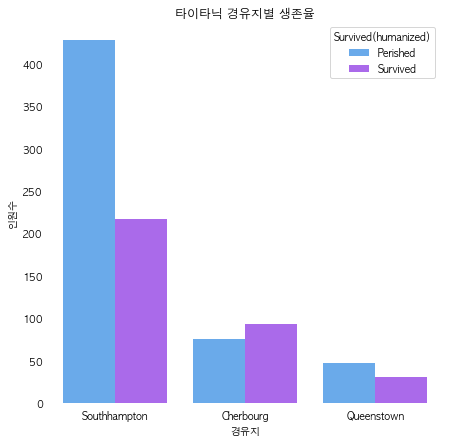

In [174]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
sns.countplot(data=train, x="Embarked(humanized)",hue="Survived(humanized)", palette="cool")

ax.tick_params(bottom=False, left=False, top=False, right=False)

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title("타이타닉 경유지별 생존율")
ax.set_ylabel("인원수")
ax.set_xlabel("경유지")


### Insight from the Data
단순히 그래프로 봤을 땐, Southhampton에서 탑승한 승객의 사망률이 다른 두 곳보다 압도적으로 높은 것을 볼 수 있습니다.   
높은 사망률의 원인이 단순히 높은 샘플 수에 의한 것인지 아니면 또 다른 요인에 의한 것인지를 조금 더 깊게 파볼 필요가 있을 것 같습니다. 

현재 유추할 수 있는 가능성은 2가지 입니다:  
1) Southhampton에서 탑승한 인원이 가장 많아서, 확률적으로 사망자가 많은 것 (생존율도 제일 높은 것을 봤을 때 이 가능성이 클 것 같습니다.)  
2) 또 다른 요인 (성별, 몇등급 티켓 구매) 등으로 인한 영향 (아무래도 비싼 티켓을 샀다면 대피하는데 있어서 어떠한 혜택이 있지 않았을지의 가능성을 추론할 수 있습니다.)

**5. Embarked 컬럼과 Pclass 컬럼을 One Hot Encoding 해주세요.**

앞서 작성한 코드를 활용하여 Embarked 컬럼과 Pclass 컬럼을 충분히 분석한 것 같습니다. 이번에는 이 두 개의 컬럼을 의사결정나무(Decision Tree)와 같은 머신러닝(Machine Learning) 알고리즘에 넣을 수 있도록 [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)을 해줄려고 합니다. 먼저 Embarked 컬럼을 바탕으로, 다음의 세 개의 컬럼을 새롭게 만들고 싶습니다.

  1. **Embarked(Cherbourg)** - Embarked 컬럼 안에 있는 값이 C면 True, 아니면 False가 들어갑니다.
  1. **Embarked(Southampton)** - Embarked 컬럼 안에 있는 값이 S면 True, 아니면 False가 들어갑니다.
  1. **Embarked(Queenstown)** - Embarked 컬럼 안에 있는 값이 Q면 True, 아니면 False가 들어갑니다.

최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Embarked</th>

<th>Embarked(humanized)</th>

<th>Embarked(Cherbourg)</th>

<th>Embarked(Southampton)</th>

<th>Embarked(Queenstown)</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>S</td>

<td>Southampton</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>2</th>

<td>C</td>

<td>Cherbourg</td>

<td>True</td>

<td>False</td>

<td>False</td>
</tr>

<tr>
<th>3</th>

<td>S</td>

<td>Southampton</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>4</th>

<td>S</td>

<td>Southampton</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>5</th>

<td>S</td>

<td>Southampton</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>6</th>

<td>Q</td>

<td>Queenstown</td>

<td>False</td>

<td>False</td>

<td>True</td>
</tr>

<tr>
<th>7</th>

<td>S</td>

<td>Southampton</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>8</th>

<td>S</td>

<td>Southampton</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>9</th>

<td>S</td>

<td>Southampton</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>10</th>

<td>C</td>

<td>Cherbourg</td>

<td>True</td>

<td>False</td>

<td>False</td>
</tr>
</tbody>
</table>

Pclass 컬럼도 비슷하게 다음의 세 개의 컬럼이 만들어져야 합니다.

  1. **Pclass(First Class)** - Pclass 컬럼 안에 있는 값이 1이면 True, 아니면 False가 들어갑니다.
  1. **Pclass(Business)** - Pclass 컬럼 안에 있는 값이 2면 True, 아니면 False가 들어갑니다.
  1. **Pclass(Economy)** - Pclass 컬럼 안에 있는 값이 3이면 True, 아니면 False가 들어갑니다.
  
최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Pclass</th>

<th>Pclass(humanized)</th>

<th>Pclass(First Class)</th>

<th>Pclass(Business)</th>

<th>Pclass(Economy)</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>3</td>

<td>Economy</td>

<td>False</td>

<td>False</td>

<td>True</td>
</tr>

<tr>
<th>2</th>

<td>1</td>

<td>First Class</td>

<td>True</td>

<td>False</td>

<td>False</td>
</tr>

<tr>
<th>3</th>

<td>3</td>

<td>Economy</td>

<td>False</td>

<td>False</td>

<td>True</td>
</tr>

<tr>
<th>4</th>

<td>1</td>

<td>First Class</td>

<td>True</td>

<td>False</td>

<td>False</td>
</tr>

<tr>
<th>5</th>

<td>3</td>

<td>Economy</td>

<td>False</td>

<td>False</td>

<td>True</td>
</tr>

<tr>
<th>6</th>

<td>3</td>

<td>Economy</td>

<td>False</td>

<td>False</td>

<td>True</td>
</tr>

<tr>
<th>7</th>

<td>1</td>

<td>First Class</td>

<td>True</td>

<td>False</td>

<td>False</td>
</tr>

<tr>
<th>8</th>

<td>3</td>

<td>Economy</td>

<td>False</td>

<td>False</td>

<td>True</td>
</tr>

<tr>
<th>9</th>

<td>3</td>

<td>Economy</td>

<td>False</td>

<td>False</td>

<td>True</td>
</tr>

<tr>
<th>10</th>

<td>2</td>

<td>Business</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>
</tbody>
</table>

Embarked 컬럼과 Pclass 컬럼을 활용하여 앞서 설명한 여섯 개의 컬럼을 만들어주세요.

In [175]:
#One Hot Encoding train["Embarked"]
embarkment = ["Cherbourg","Southhampton","Queenstown"]

for i in range(len(embarkment)):
    train[f"Embarked({embarkment[i]})"] = (train["Embarked(humanized)"]== embarkment[i])
    
train[["Embarked","Embarked(humanized)","Embarked(Cherbourg)","Embarked(Southhampton)","Embarked(Queenstown)"]].head(10)

,Embarked,Embarked(humanized),Embarked(Cherbourg),Embarked(Southhampton),Embarked(Queenstown)
PassengerId,,,,,
1,S,Southhampton,False,True,False
2,C,Cherbourg,True,False,False
3,S,Southhampton,False,True,False
4,S,Southhampton,False,True,False
5,S,Southhampton,False,True,False
6,Q,Queenstown,False,False,True
7,S,Southhampton,False,True,False
8,S,Southhampton,False,True,False
9,S,Southhampton,False,True,False


In [176]:
#One Hot Encoding train["Pclass"]
passengers = ["Economy","Business","First Class"]

for i in range(len(embarkment)):
    train[f"Pclass({passengers[i]})"] = (train["Pclass(humanized)"]== passengers[i])
    
train[["Pclass","Pclass(humanized)","Pclass(First Class)","Pclass(Business)","Pclass(Economy)"]].head(10)

,Pclass,Pclass(humanized),Pclass(First Class),Pclass(Business),Pclass(Economy)
PassengerId,,,,,
1,3,Economy,False,False,True
2,1,First Class,True,False,False
3,3,Economy,False,False,True
4,1,First Class,True,False,False
5,3,Economy,False,False,True
6,3,Economy,False,False,True
7,1,First Class,True,False,False
8,3,Economy,False,False,True
9,3,Economy,False,False,True


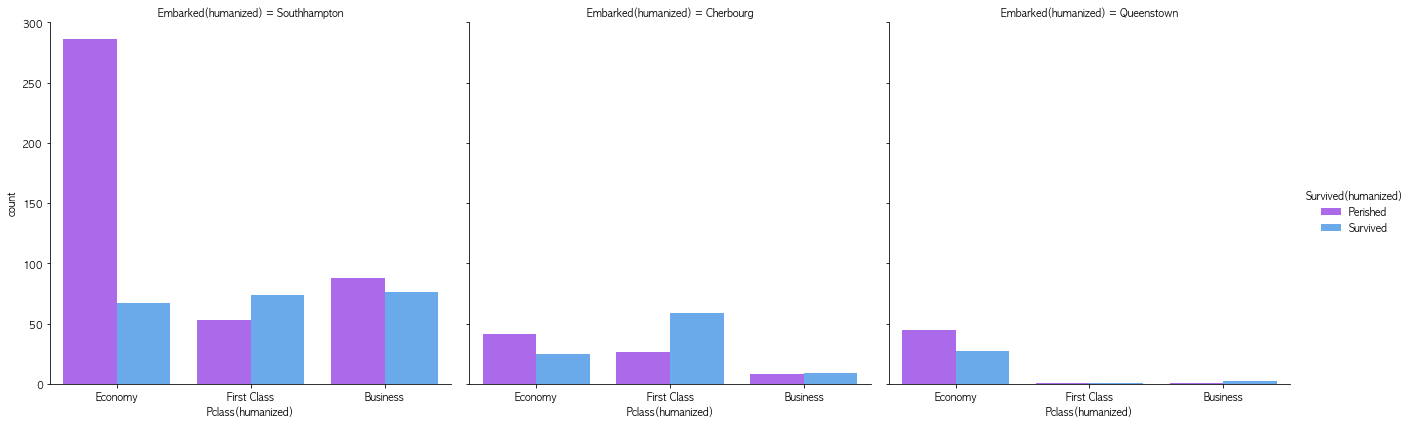

In [177]:
sns.catplot(x="Pclass(humanized)", hue="Survived(humanized)", col="Embarked(humanized)", data=train, kind="count", height=6, aspect=1, palette="cool_r")

경유지와 좌석등급을 동시에 분석해본 결과, 역시 Southhampton에서 티켓을 구매한 인원이 제일 많았습니다.   
대체적으로 1등석을 구매한 승객의 생존율이 제일 높았고 그 다음 2등급, 3등급순으로 일찍 예상했었던 티켓의 가격에 따른 객실의 위치나 어떠한 요소가 생존율에 영향을 끼친것 같습니다.  
하지만 단순히 출발지였었기 때문에 가장 많은 고객이 탑승한 Southhampton이 생존율에 영향을 끼쳤다는 결론은 못 낼 것 같습니다 (예: "사우스햄튼에서 탑승하면 생존확률이 더 높다").  
하지만 생존율을 예측하는데 있어선 두 칼럼 다 무척 중요한 칼럼이라는 것은 확실합니다.

### 나이(Age) 컬럼 분석

**6. 나이(Age) 컬럼에서 다음의 정보를 출력해주세요.**

  * 평균(mean)
  * 분산(standard deviation, 이하 std) 
  * 가장 나이가 많은 사람.
  * 가장 나이가 적은 사람.
  
가령 평균은 약 29.7세, 분산(std)은 약 14.52가 나와야 합니다.

In [178]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**7. 객실 등급별 나이(Age) 컬럼의 평균을 보여주세요.**

이번에는 전체 평균이 아닌 객실 등급(Pclass)별 평균을 보고 싶습니다.

가령 전체 승객의 평균 나이는 약 29.7세이지만, 1등급 승객의 평균 나이는 약 38.2세가 나와야 합니다. 비슷한 방식으로 2등급과 3등급 승객의 평균 나이를 알 수 있다면 좋겠습니다.

In [179]:
pd.pivot_table(data=train,index="Pclass(humanized)",values="Age")

,Age
Pclass(humanized),
Business,29.877630
Economy,25.140620
First Class,38.233441


**8. 나이를 일정 구역으로 나눠서, 구역마다의 생존률을 보여주세요.**

이번에는 나이(Age)별 생존률을 확인하고 싶습니다. 다만 나이 컬럼은 숫자이기 때문에, 그대로 쓰지 않고 일정 구역으로 나눈 뒤 생존률의 통계를 내는 것이 보기 편할 것입니다. 그러므로 나이 컬럼을 다음의 세 구역으로 나눕니다.

  1. 나이가 15세 미만인 승객.
  2. 나이가 15세 이상이고 30세 미만인 승객.
  3. 나이가 30세 이상인 승객.

최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Age</th>

<th>AgeType</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>22.0</td>

<td>Medium</td>
</tr>

<tr>
<th>2</th>

<td>38.0</td>

<td>Old</td>
</tr>

<tr>
<th>3</th>

<td>26.0</td>

<td>Medium</td>
</tr>

<tr>
<th>4</th>

<td>35.0</td>

<td>Old</td>
</tr>

<tr>
<th>5</th>

<td>35.0</td>

<td>Old</td>
</tr>

<tr>
<th>6</th>

<td>NaN</td>

<td>NaN</td>
</tr>

<tr>
<th>7</th>

<td>54.0</td>

<td>Old</td>
</tr>

<tr>
<th>8</th>

<td>2.0</td>

<td>Young</td>
</tr>

<tr>
<th>9</th>

<td>27.0</td>

<td>Medium</td>
</tr>

<tr>
<th>10</th>

<td>14.0</td>

<td>Young</td>
</tr>
</tbody>
</table>

또한, 위 조건에서 1번, 2번, 3번 구역에 해당하는 승객의 평균 생존률을 구하고 싶습니다.

가령 1번 구역(나이가 15세 미만)에 해당하는 승객의 평균 생존률은 약 57.7%가 나와야 합니다.

In [180]:
train.loc[train["Age"]<15, "AgeType"] = "Young"
train.loc[(train["Age"]>=15) & (train["Age"]<30), "AgeType"] = "Medium"
train.loc[train["Age"]>=30, "AgeType"] = "Old"

pd.pivot_table(data=train,index="AgeType",values="Survived")

,Survived
AgeType,
Medium,0.362745
Old,0.406061
Young,0.576923


**9. 나이가 비어있는 승객과 비어있지 않은 승객의 생존률 차이를 보여주세요.**

이번에는 다른 방식으로 생존률의 차이를 보겠습니다. 타이타닉 데이터의 나이(Age) 컬럼을 자세히 보면 나이가 비어있는 데이터가 있습니다. 판다스에서는 이를 NaN(Not a Number의 약자)으로 표현합니다.

타이타닉 데이터에서 나이 컬럼이 비어있는 승객과 비어있지 않은 승객의 생존률을 각각 찾아서 출력해주세요.

In [181]:
train.loc[train["Age"].isnull(),"blank"] = "Blank"
train.loc[train["Age"].notnull(),"blank"] = "Not Blank"

train.groupby("blank")["Survived"].mean()

blank
Blank        0.293785
Not Blank    0.406162
Name: Survived, dtype: float64

**10. Pclass별 나이(Age)의 평균을 구한 뒤 빈 값에 채워주세요.**

이번에는 나이(Age) 컬럼의 빈 값을 채우고 싶습니다. 일반적으로 가장 많이 하는 방식은 나이의 평균(mean)값을 구한 뒤 이를 빈 값에 채워넣는 것입니다. 하지만 이번에는 다른 방식으로 빈 값을 채우고 싶은데, 바로 객실 등급(Pclass)에 따라 다르게 나이의 빈 값을 채워주고 싶습니다. 가령

  1. 객실 등급(Pclass)이 1등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값을 채워줍니다.
  2. 객실 등급(Pclass)이 2등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값을 채워줍니다.
  3. 객실 등급(Pclass)이 3등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값을 채워줍니다.
  
위와 같은 방식을 사용하면, 단순히 전체 평균을 사용하는 것 보다 조금 더 원래 값에 근접하게 평균을 채워줄 수 있을 것 같습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Pclass</th>

<th>Age</th>

<th>Age(fill)</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>3</td>

<td>22.0</td>

<td>22.00000</td>
</tr>

<tr>
<th>2</th>

<td>1</td>

<td>38.0</td>

<td>38.00000</td>
</tr>

<tr>
<th>3</th>

<td>3</td>

<td>26.0</td>

<td>26.00000</td>
</tr>

<tr>
<th>4</th>

<td>1</td>

<td>35.0</td>

<td>35.00000</td>
</tr>

<tr>
<th>5</th>

<td>3</td>

<td>35.0</td>

<td>35.00000</td>
</tr>

<tr>
<th>6</th>

<td>3</td>

<td>NaN</td>

<td>25.14062</td>
</tr>

<tr>
<th>7</th>

<td>1</td>

<td>54.0</td>

<td>54.00000</td>
</tr>

<tr>
<th>8</th>

<td>3</td>

<td>2.0</td>

<td>2.00000</td>
</tr>

<tr>
<th>9</th>

<td>3</td>

<td>27.0</td>

<td>27.00000</td>
</tr>

<tr>
<th>10</th>

<td>2</td>

<td>14.0</td>

<td>14.00000</td>
</tr>

<tr>
<th>11</th>

<td>3</td>

<td>4.0</td>

<td>4.00000</td>
</tr>

<tr>
<th>12</th>

<td>1</td>

<td>58.0</td>

<td>58.00000</td>
</tr>

<tr>
<th>13</th>

<td>3</td>

<td>20.0</td>

<td>20.00000</td>
</tr>

<tr>
<th>14</th>

<td>3</td>

<td>39.0</td>

<td>39.00000</td>
</tr>

<tr>
<th>15</th>

<td>3</td>

<td>14.0</td>

<td>14.00000</td>
</tr>

<tr>
<th>16</th>

<td>2</td>

<td>55.0</td>

<td>55.00000</td>
</tr>

<tr>
<th>17</th>

<td>3</td>

<td>2.0</td>

<td>2.00000</td>
</tr>

<tr>
<th>18</th>

<td>2</td>

<td>NaN</td>

<td>29.87763</td>
</tr>

<tr>
<th>19</th>

<td>3</td>

<td>31.0</td>

<td>31.00000</td>
</tr>

<tr>
<th>20</th>

<td>3</td>

<td>NaN</td>

<td>25.14062</td>
</tr>
</tbody>
</table>

In [182]:
#Calculate the average age based on the passenger class and assign the variables
economy = train["Age"].loc[train["Pclass"]==3].mean()
business = train["Age"].loc[train["Pclass"]==2].mean()
first = train["Age"].loc[train["Pclass"]==1].mean()

#copy "Age" to "Age(filled)"
train["Age(filled)"] = train["Age"]

#assign average to NaN based on Passenger Class
train.loc[(train["Pclass"]==1)&(train['blank']=="Blank"), "Age(filled)"] = first
train.loc[(train["Pclass"]==2)&(train['blank']=="Blank"), "Age(filled)"] = business
train.loc[(train["Pclass"]==3)&(train['blank']=="Blank"), "Age(filled)"] = economy

train[["Pclass","Age","Age(filled)"]].head(20)


,Pclass,Age,Age(filled)
PassengerId,,,
1,3,22.0,22.00000
2,1,38.0,38.00000
3,3,26.0,26.00000
4,1,35.0,35.00000
5,3,35.0,35.00000
6,3,NaN,25.14062
7,1,54.0,54.00000
8,3,2.0,2.00000
9,3,27.0,27.00000


Text(0.5,0,'연령대')

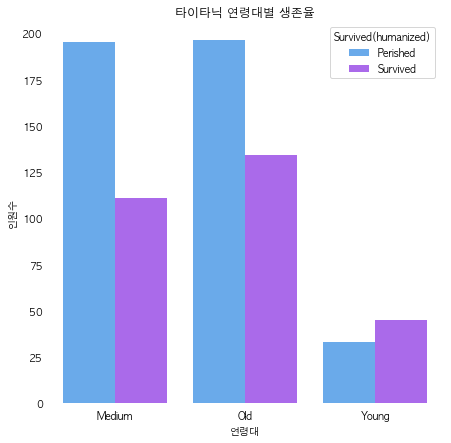

In [183]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
sns.countplot(data=train, x="AgeType",hue="Survived(humanized)", palette="cool")

ax.tick_params(bottom=False, left=False, top=False, right=False)

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title("타이타닉 연령대별 생존율")
ax.set_ylabel("인원수")
ax.set_xlabel("연령대")

### Insights from Data
**연령대별로 분석한 결과 15세 미만의 연령대 (young)의 생존율이 높은 것을 알 수 있습니다. 이는 보통 15세 미만의 승객은 혼자 타기보다는 가족 (부모 등)과 동승하는 경우가 많기 때문에  
부모들이 최우선적으로 자식의 생명을 지키려고 노력할 가능성이 높기 때문으로 추측합니다. 또한 높은 나이대(old)의 생존율도 상당히 높게 나왔는데 이 역시 노약자 우선으로 구명보트에 태운 것이 아닌가라고  
추측됩니다.**

### SibSp, Parch 컬럼 분석

**11. 타이타닉호에 동승한 형제, 자매, 배우자(SibSp)도 없고, 부모와 자식(Parch)도 없는 사람을 구해주세요.**

해당 사용자를 싱글(Single)이라고 가정하겠습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>SibSp</th>

<th>Parch</th>

<th>Single</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>1</td>

<td>0</td>

<td>False</td>
</tr>

<tr>
<th>2</th>

<td>1</td>

<td>0</td>

<td>False</td>
</tr>

<tr>
<th>3</th>

<td>0</td>

<td>0</td>

<td>True</td>
</tr>

<tr>
<th>4</th>

<td>1</td>

<td>0</td>

<td>False</td>
</tr>

<tr>
<th>5</th>

<td>0</td>

<td>0</td>

<td>True</td>
</tr>
</tbody>
</table>

또한 싱글(Single)인 사람과 그렇지 않은 사람간의 생존률의 차이도 알고 싶습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Survived</th>
</tr>

<tr>
<th>Single</th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>False</th>

<td>0.505650</td>
</tr>

<tr>
<th>True</th>

<td>0.303538</td>
</tr>
</tbody>
</table>

In [184]:
train["Single"] = (train["SibSp"]==0)&(train["Parch"]==0)

train[["SibSp","Parch","Single"]].head()

,SibSp,Parch,Single
PassengerId,,,
1,1,0,False
2,1,0,False
3,0,0,True
4,1,0,False
5,0,0,True


In [185]:
pd.pivot_table(data=train,index="Single",values="Survived")

,Survived
Single,
False,0.505650
True,0.303538


**12. SibSp 컬럼과  Parch 컬럼을 활용하여 가족 수(FamilySize)라는 새로운 컬럼을 만들어주세요.**

형제, 자매, 배우자(SibSp) 컬럼과 부모 자식(Parch) 컬럼은 얼핏 달라 보이지만 실은 가족 관계를 나타내는 것이라고 볼 수 있습니다. 그러므로 두 컬럼을 하나로 합쳐서 **가족 수(FamilySize)**라는 새로운 컬럼을 만들면 승객의 가족관계를 더 편리하게 분석할 수 있을 것입니다.

형제, 자매, 배우자(SibSp) 컬럼과 부모 자식(Parch) 컬럼을 더해서 가족 수(FamilySize) 컬럼을 만들어주세요. 단 가족 수를 계산할때는 언제나 나 자신을 포함해서 계산하는데, 나 자신은 SibSp 컬럼에도 Parch 컬럼에도 들어가있지 않습니다. 그러므로 가족 수(FamilySize) 컬럼은 언제나 SibSp 컬럼과 Parch 컬럼을 더한 값에서 하나가 더 많아야 합니다.

그러므로 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>SibSp</th>

<th>Parch</th>

<th>FamilySize</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>1</td>

<td>0</td>

<td>2</td>
</tr>

<tr>
<th>2</th>

<td>1</td>

<td>0</td>

<td>2</td>
</tr>

<tr>
<th>3</th>

<td>0</td>

<td>0</td>

<td>1</td>
</tr>

<tr>
<th>4</th>

<td>1</td>

<td>0</td>

<td>2</td>
</tr>

<tr>
<th>5</th>

<td>0</td>

<td>0</td>

<td>1</td>
</tr>

<tr>
<th>6</th>

<td>0</td>

<td>0</td>

<td>1</td>
</tr>

<tr>
<th>7</th>

<td>0</td>

<td>0</td>

<td>1</td>
</tr>

<tr>
<th>8</th>

<td>3</td>

<td>1</td>

<td>5</td>
</tr>

<tr>
<th>9</th>

<td>0</td>

<td>2</td>

<td>3</td>
</tr>

<tr>
<th>10</th>

<td>1</td>

<td>0</td>

<td>2</td>
</tr>
</tbody>
</table>

또한 가족 수(FamilySize) 컬럼을 구한 뒤, 가족 수 별 생존률의 차이도 알고 싶습니다. 가족 수(ex: 1명 ~ 11명) 마다의 생존률을 구해서 출력해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Survived</th>
</tr>

<tr>
<th>FamilySize</th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>0.303538</td>
</tr>

<tr>
<th>2</th>

<td>0.552795</td>
</tr>

<tr>
<th>3</th>

<td>0.578431</td>
</tr>

<tr>
<th>4</th>

<td>0.724138</td>
</tr>

<tr>
<th>5</th>

<td>0.200000</td>
</tr>

<tr>
<th>6</th>

<td>0.136364</td>
</tr>

<tr>
<th>7</th>

<td>0.333333</td>
</tr>

<tr>
<th>8</th>

<td>0.000000</td>
</tr>

<tr>
<th>11</th>

<td>0.000000</td>
</tr>
</tbody>
</table>

In [186]:
train["FamilySize"] = train["Parch"]+train["SibSp"]+1

train[["SibSp","Parch","FamilySize"]].head(10)

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1
6,0,0,1
7,0,0,1
8,3,1,5
9,0,2,3


In [187]:
pd.pivot_table(data=train,index="FamilySize",values="Survived")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


**13. 가족 수(FamilySize) 컬럼의 구역을 나눠주세요.**

가족 수(FamilySize) 컬럼을 기준으로 pivot_table로 분석을 해본 결과, 경우의 수가 너무 많아서(가족 수가 1명일 때 ~ 11명일 때) 분석 결과가 너무 잘게 쪼개지는 것 같습니다.

그러므로 가족 수(FamilySize) 컬럼을 세 구역으로 나누고 싶습니다. 구체적으로는 다음과 같습니다.

  * **싱글(Single)** - 동승한 가족이 아무도 없고, 나 혼자 탑승한 경우입니다.
  * **핵가족(Nuclear)** - 동승한 가족이 나 자신을 포함해 2명 이상 5명 미만인 경우입니다.
  * **대가족(Big)** - 동승한 가족이 나 자신을 포함 5명 이상인 경우입니다.
  
위의 정보를 활용하여, 가족 형태(FamilyType)라는 새로운 컬럼을 만들어 주세요. 이 컬럼에는 앞서 설명한 Single, Nuclear, 그리고 Big이 들어갑니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>FamilySize</th>

<th>FamilyType</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>2</td>

<td>Nuclear</td>
</tr>

<tr>
<th>2</th>

<td>2</td>

<td>Nuclear</td>
</tr>

<tr>
<th>3</th>

<td>1</td>

<td>Single</td>
</tr>

<tr>
<th>4</th>

<td>2</td>

<td>Nuclear</td>
</tr>

<tr>
<th>5</th>

<td>1</td>

<td>Single</td>
</tr>

<tr>
<th>6</th>

<td>1</td>

<td>Single</td>
</tr>

<tr>
<th>7</th>

<td>1</td>

<td>Single</td>
</tr>

<tr>
<th>8</th>

<td>5</td>

<td>Big</td>
</tr>

<tr>
<th>9</th>

<td>3</td>

<td>Nuclear</td>
</tr>

<tr>
<th>10</th>

<td>2</td>

<td>Nuclear</td>
</tr>
</tbody>
</table>

또한 가족 수(FamilySize)와 마찬가지로 가족 형태(FamilyType) 별 생존률의 차이도 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Survived</th>
</tr>

<tr>
<th>FamilyType</th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>Big</th>

<td>0.161290</td>
</tr>

<tr>
<th>Nuclear</th>

<td>0.578767</td>
</tr>

<tr>
<th>Single</th>

<td>0.303538</td>
</tr>
</tbody>
</table>

In [188]:
train.loc[train["FamilySize"]==1, "FamilyType"] = "Single"
train.loc[(train["FamilySize"]>1)&(train["FamilySize"]<5), "FamilyType"] = "Nuclear"
train.loc[(train["FamilySize"]>=5),"FamilyType"] = "Big"

train[["FamilySize","FamilyType"]].head(10)

,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


In [189]:
pd.pivot_table(data=train,index="FamilyType",values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


Text(0.5,0,'가족구성')

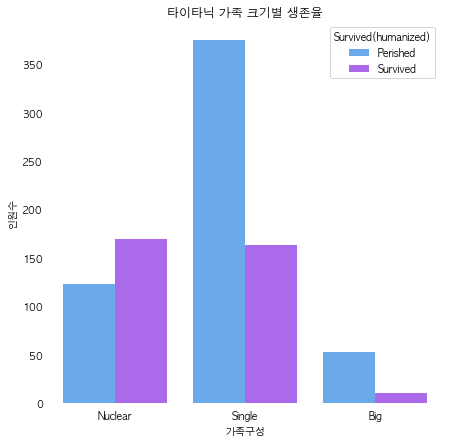

In [190]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
sns.countplot(data=train, x="FamilyType",hue="Survived(humanized)", palette="cool")

ax.tick_params(bottom=False, left=False, top=False, right=False)

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title("타이타닉 가족 크기별 생존율")
ax.set_ylabel("인원수")
ax.set_xlabel("가족구성")

### Insight from Data
**가족구성원의 생존율은 핵가족과 독신이 대가족에 비해 압도적으로 높습니다. 이는 대가족의 탑승인원이 총합 50명을 넘지않는 적은 인원이 탑승한 요인도 있지만, 아무래도 대가족이면 가족구성원을 모두 찾아서    
생존해야되는 것이 재난 발생 후 즉시 대처 가능한 독신이나 가족구성원이 적은 핵가족에 비해 생존율이 적을 수 밖에 없다고 유추 가능합니다.
그에 비해 독신의 사망율이 높은 것은 아무래도 재난에 대한 대처도 가장 빠른 것이 사실이지만,    
반대로 재난에 대해 인지하고  (밤중에 터진 재난이기 때문에 자고 있는 독신을 안챙길 가능성이 높지 않을까 싶습니다) 알려줄 지인이나 가족의 부재가
사망률을 높인 것이 아닐까 추측할 수 있습니다.**

**14. Single, Nuclear, Big 을 각각 One Hot Encoding 해주세요.**

앞서 작성한 코드를 분석한 결과, 가족 형태(FamilyType) 컬럼의 값이 생존자와 사망자를 판가름하는데 굉장히 중요한 영향을 차지하는 것 같습니다. 그러므로 이 컬럼값을 이번에는 이 두 개의 컬럼을 의사결정나무(Decision Tree)와 같은 머신러닝(Machine Learning) 알고리즘에 넣을 수 있도록 [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)을 해줄려고 합니다.

먼저 가족 수(FamilySize)를 바탕으로, 다음의 세 컬럼을 추가로 만들고 싶습니다.

  1. **FamilyType(Single)** - FamilySize가 1이면 True, 아니면 False가 들어갑니다.
  1. **FamilyType(Nuclear)** - FamilySize가 2 이상 5 미만이면 True, 아니면 False가 들어갑니다.
  1. **FamilyType(Big)** - FamilySize가 5 이상이면 True, 아니면 False가 나와야 합니다.

최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>FamilySize</th>

<th>FamilyType(Single)</th>

<th>FamilyType(Nuclear)</th>

<th>FamilyType(Big)</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>2</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>2</th>

<td>2</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>3</th>

<td>1</td>

<td>True</td>

<td>False</td>

<td>False</td>
</tr>

<tr>
<th>4</th>

<td>2</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>5</th>

<td>1</td>

<td>True</td>

<td>False</td>

<td>False</td>
</tr>

<tr>
<th>6</th>

<td>1</td>

<td>True</td>

<td>False</td>

<td>False</td>
</tr>

<tr>
<th>7</th>

<td>1</td>

<td>True</td>

<td>False</td>

<td>False</td>
</tr>

<tr>
<th>8</th>

<td>5</td>

<td>False</td>

<td>False</td>

<td>True</td>
</tr>

<tr>
<th>9</th>

<td>3</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>

<tr>
<th>10</th>

<td>2</td>

<td>False</td>

<td>True</td>

<td>False</td>
</tr>
</tbody>
</table>

In [191]:
family = ["Single","Nuclear","Big"]
for i in range(len(family)):
    train[f"FamilyType({family[i]})"] = (train["FamilyType"]== family[i])

train[["FamilySize","FamilyType(Single)","FamilyType(Nuclear)","FamilyType(Big)"]].head(10)

,FamilySize,FamilyType(Single),FamilyType(Nuclear),FamilyType(Big)
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


### 이름(Name) 컬럼 분석

**15. 이름(Name) 컬럼에서 호칭(Title) 컬럼을 뽑아주세요.**

이름(Name) 컬럼은 얼핏 분석하기 까다로워 보이지만, 실은 간단한 패턴으로 이루어져 있습니다. 일단 ```,```과 ```.```을 기준으로

  1. ```,```의 앞에 있는 부분이 성(SurName)이며,
  2. ```,```과 ```.``` 사이에 있는 부분은 승객의 호칭(Title)입니다.
  3. 마지막으로 ```.``` 뒤에 있는 부분은 이름(FirstName) 입니다.
  
가령 ```Braund, Mr. Owen Harris``` 이라는 이름의 승객은, 1) Braund라는 성을 가진, 2) Mr라는 호칭을 가진, 3) Owen Harris 라는 이름을 가진 승객으로 해석할 수 있습니다.

사용자의 이름(Name) 컬럼에서 **호칭(Title)** 컬럼을 추출해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Name</th>

<th>Title</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>Braund, Mr. Owen Harris</td>

<td>Mr</td>
</tr>

<tr>
<th>2</th>

<td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>

<td>Mrs</td>
</tr>

<tr>
<th>3</th>

<td>Heikkinen, Miss. Laina</td>

<td>Miss</td>
</tr>

<tr>
<th>4</th>

<td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>

<td>Mrs</td>
</tr>

<tr>
<th>5</th>

<td>Allen, Mr. William Henry</td>

<td>Mr</td>
</tr>

<tr>
<th>6</th>

<td>Moran, Mr. James</td>

<td>Mr</td>
</tr>

<tr>
<th>7</th>

<td>McCarthy, Mr. Timothy J</td>

<td>Mr</td>
</tr>

<tr>
<th>8</th>

<td>Palsson, Master. Gosta Leonard</td>

<td>Master</td>
</tr>

<tr>
<th>9</th>

<td>Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)</td>

<td>Mrs</td>
</tr>

<tr>
<th>10</th>

<td>Nasser, Mrs. Nicholas (Adele Achem)</td>

<td>Mrs</td>
</tr>
</tbody>
</table>

또한 호칭(Title) 별 생존률의 차이도 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Survived</th>
</tr>

<tr>
<th>Title</th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>Capt</th>

<td>0.000000</td>
</tr>

<tr>
<th>Col</th>

<td>0.500000</td>
</tr>

<tr>
<th>Don</th>

<td>0.000000</td>
</tr>

<tr>
<th>Dr</th>

<td>0.428571</td>
</tr>

<tr>
<th>Jonkheer</th>

<td>0.000000</td>
</tr>

<tr>
<th>Lady</th>

<td>1.000000</td>
</tr>

<tr>
<th>Major</th>

<td>0.500000</td>
</tr>

<tr>
<th>Master</th>

<td>0.575000</td>
</tr>

<tr>
<th>Miss</th>

<td>0.697802</td>
</tr>

<tr>
<th>Mlle</th>

<td>1.000000</td>
</tr>

<tr>
<th>Mme</th>

<td>1.000000</td>
</tr>

<tr>
<th>Mr</th>

<td>0.156673</td>
</tr>

<tr>
<th>Mrs</th>

<td>0.792000</td>
</tr>

<tr>
<th>Ms</th>

<td>1.000000</td>
</tr>

<tr>
<th>Rev</th>

<td>0.000000</td>
</tr>

<tr>
<th>Sir</th>

<td>1.000000</td>
</tr>

<tr>
<th>the Countess</th>

<td>1.000000</td>
</tr>
</tbody>
</table>

In [192]:
# Take name as a variable. 이름을 변수로 받아들여 호칭만 분리하는 함수를 만듭니다.
def get_title(name):
    return name.split(",")[1].split(". ")[0]

#함수가 제대로 동작하는지 시험해보겠습니다.
print(get_title("Han, Master. Jeong Min"))

 Master


In [193]:
# apply the function to entire Name column. get_title함수를 Name칼럼 전체에 적용합니다.
train["Title"] = train["Name"].apply(get_title)
train[["Name","Title"]].head(10)

,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


In [194]:
pd.pivot_table(data=train,index="Title", values="Survived")

,Survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


**16. 호칭(Title) 컬럼을 정리해주세요.**

호칭(Title) 컬럼은 생존자와 사망자를 구문하는데 중요한 역할을 담당합니다만, 너무 종류가 많은 단점이 있습니다. 

가령 호칭(Title) 컬럼은 Mr, Mrs, Miss, Master가 전체 승객의 호칭의 대부분을 차지하며, Capt, Col, Don, Sir 등과 같은 컬럼들은 모수가 작아서 오히려 신뢰할 수 없습니다.

가령 Sir라는 호칭을 가진 승객의 생존률이 100%라고 하더라도, 전체 승객애서 오직 1명만이 Sir라는 호칭을 사용하고 있기 때문에, "Sir라는 호칭을 사용하는 사람은 언제나 생존률이 높다."고 이야기하기에는 어렵습니다.



In [195]:
# crosstab을 활용하여 각 호칭(Title)별 생존자의 총 인원수와 사망자의 총 인원수를 출력합니다.
pd.crosstab(train["Title"], train["Survived"], margins=True)

Survived,0,1,All
Title,,,
Capt,1,0,1
Col,1,1,2
Don,1,0,1
Dr,4,3,7
Jonkheer,1,0,1
Lady,0,1,1
Major,1,1,2
Master,17,23,40
Miss,55,127,182


그러므로 호칭 컬럼의 종류를 간소화하고 싶습니다. 호칭(Title) 컬럼에서 Mr, Mrs, Miss, Master를 제외한 나머지 값은 전부 **Other**라는 값으로 통일해주세요. 최종적으로 하위 5개의 데이터에서는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Name</th>

<th>Title</th>

<th>Title(Clean)</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>887</th>

<td>Montvila, Rev. Juozas</td>

<td>Rev</td>

<td>Others</td>
</tr>

<tr>
<th>888</th>

<td>Graham, Miss. Margaret Edith</td>

<td>Miss</td>

<td>Miss</td>
</tr>

<tr>
<th>889</th>

<td>Johnston, Miss. Catherine Helen "Carrie"</td>

<td>Miss</td>

<td>Miss</td>
</tr>

<tr>
<th>890</th>

<td>Behr, Mr. Karl Howell</td>

<td>Mr</td>

<td>Mr</td>
</tr>

<tr>
<th>891</th>

<td>Dooley, Mr. Patrick</td>

<td>Mr</td>

<td>Mr</td>
</tr>
</tbody>
</table>

또한 마찬가지로 새롭게 정리한 호칭별 생존률의 차이도 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Survived</th>
</tr>

<tr>
<th>Title(Clean)</th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>Master</th>

<td>0.575000</td>
</tr>

<tr>
<th>Miss</th>

<td>0.697802</td>
</tr>

<tr>
<th>Mr</th>

<td>0.156673</td>
</tr>

<tr>
<th>Mrs</th>

<td>0.792000</td>
</tr>

<tr>
<th>Others</th>

<td>0.444444</td>
</tr>
</tbody>
</table>

In [196]:
#get_title함수를 수정해서 Mr.,Master, Mrs., Miss 외의 호칭은 Other로 통합하겠습니다
def get_clean_title(name):
    title = name.split(", ")[1].split(". ")[0]
    
    if title in ["Mr","Master","Miss","Mrs"]:
        return title
    else:
        return "Others"

train["Title(cleaned)"] = train["Name"].apply(get_clean_title)

train[["Name","Title","Title(cleaned)"]].tail()

,Name,Title,Title(cleaned)
PassengerId,,,
887,"Montvila, Rev. Juozas",Rev,Others
888,"Graham, Miss. Margaret Edith",Miss,Miss
889,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,Miss
890,"Behr, Mr. Karl Howell",Mr,Mr
891,"Dooley, Mr. Patrick",Mr,Mr


In [197]:
pd.pivot_table(data=train,index="Title(cleaned)", values="Survived")

,Survived
Title(cleaned),
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Others,0.444444


**17. 호칭(Title) 컬럼으로 결혼 유무를 파악해주세요.**

앞서 우리가 추출한 호칭 컬럼의 주요 값에 대한 설명은 다음과 같습니다.

  * Mr - 결혼한 남성을 의미합니다.
  * Master - 결혼하지 않은 남성을 의미합니다.
  * Mrs - 결혼한 여성을 의미합니다.
  * Miss - 결혼하지 않은 여성을 의미합니다.
  
그러므로 호칭(Title) 컬럼값에서는 추가로 결혼 여부를 뽑아낼 수 있습니다. 호칭이 Mr이거나 Mrs이면 결혼했다고 간주하고, Master이거나 Miss이면 결혼하지 않았다고 간주할 수 있습니다. (나머지 호칭은 NaN을 집어넣으면 좋겠습니다)

호칭(Title) 컬럼을 활용하여 **결혼 유무(Married)**를 추출해주세요, 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Name</th>

<th>Title</th>

<th>Married</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>Braund, Mr. Owen Harris</td>

<td>Mr</td>

<td>True</td>
</tr>

<tr>
<th>2</th>

<td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>

<td>Mrs</td>

<td>True</td>
</tr>

<tr>
<th>3</th>

<td>Heikkinen, Miss. Laina</td>

<td>Miss</td>

<td>False</td>
</tr>

<tr>
<th>4</th>

<td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>

<td>Mrs</td>

<td>True</td>
</tr>

<tr>
<th>5</th>

<td>Allen, Mr. William Henry</td>

<td>Mr</td>

<td>True</td>
</tr>

<tr>
<th>6</th>

<td>Moran, Mr. James</td>

<td>Mr</td>

<td>True</td>
</tr>

<tr>
<th>7</th>

<td>McCarthy, Mr. Timothy J</td>

<td>Mr</td>

<td>True</td>
</tr>

<tr>
<th>8</th>

<td>Palsson, Master. Gosta Leonard</td>

<td>Master</td>

<td>False</td>
</tr>

<tr>
<th>9</th>

<td>Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)</td>

<td>Mrs</td>

<td>True</td>
</tr>

<tr>
<th>10</th>

<td>Nasser, Mrs. Nicholas (Adele Achem)</td>

<td>Mrs</td>

<td>True</td>
</tr>
</tbody>
</table>

또한 결혼 유무(Married)별 생존률의 차이도 구해주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Survived</th>
</tr>

<tr>
<th>Married</th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>False</th>

<td>0.675676</td>
</tr>

<tr>
<th>True</th>

<td>0.280374</td>
</tr>
</tbody>
</table>

In [198]:
train.loc[train["Title(cleaned)"].isin(["Mr", "Mrs"]), "Married"] = True
train.loc[train["Title(cleaned)"].isin(["Master", "Miss"]), "Married"] = False
train[["Name", "Title", "Married"]].tail(10)

,Name,Title,Married
PassengerId,,,
882,"Markun, Mr. Johann",Mr,True
883,"Dahlberg, Miss. Gerda Ulrika",Miss,False
884,"Banfield, Mr. Frederick James",Mr,True
885,"Sutehall, Mr. Henry Jr",Mr,True
886,"Rice, Mrs. William (Margaret Norton)",Mrs,True
887,"Montvila, Rev. Juozas",Rev,NaN
888,"Graham, Miss. Margaret Edith",Miss,False
889,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,False
890,"Behr, Mr. Karl Howell",Mr,True


In [199]:
pd.pivot_table(data=train, index="Married", values="Survived")

,Survived
Married,
False,0.675676
True,0.280374


**18. 성(Surname)과 가족 사이즈(FamilySize)를 조합해서 가족 ID(FamilyID)를 구해주세요.**

앞서 말씀드린대로 이름(Name) 컬럼은 1) 성(Surname), 2) 호칭(Title), 그리고 3) 이름(FirstName) 컬럼으로 나눌 수 있습니다. 가령 ```Braund, Mr. Owen Harris``` 라는 이름의 승객은, 1) Braund라는 성을 가진, 2) Mr라는 호칭을 가진, 3) Owen Harris 라는 이름을 가진 승객으로 해석할 수 있습니다.

여기서 위에서 발견한 성(Surname) 컬럼과 가족 수(FamilySize)를 앞뒤로 붙이면, 일명 가족 아이디(FamilyID)라는 새로운 컬럼을 얻을 수 있습니다.

가령 타이타닉의 train 데이터에서 성이 ```Graham```인 승객을 찾아보겠습니다.

In [200]:
# 이름(Name) 컬럼에서 Graham이라는 성이 포함된 승객만을 색인합니다.
# 이 결과를 graham이라는 이름의 변수에 저장한 후 출력합니다.
graham = train[train["Name"].str.contains("Graham")]
graham

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age(filled),Single,FamilySize,FamilyType,FamilyType(Single),FamilyType(Nuclear),FamilyType(Big),Title,Title(cleaned),Married
PassengerId,,,,,,,,,,,,,,,,,,,,,
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,...,58.0,False,2,Nuclear,False,True,False,Mrs,Mrs,True
333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,...,38.0,False,2,Nuclear,False,True,False,Mr,Mr,True
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,...,19.0,True,1,Single,True,False,False,Miss,Miss,False


색인 결과 Graham이라는 성을 사용하는 총 3명의 승객이 나오지만, 이 3명이 전부 같은 가족은 아닙니다. 이유는 가족 수(FamilySize) 컬럼을 보면 알 수 있습니다.

In [201]:
# graham이라는 변수에 저장된 데이터에서
# 이름(Name), 형제, 자매, 배우자(SibSp), 부모, 자식(Parch), 그리고 가족 수(FamilySize)를 출력합니다.
graham[["Name", "SibSp", "Parch", "FamilySize"]]

,Name,SibSp,Parch,FamilySize
PassengerId,,,,
269,"Graham, Mrs. William Thompson (Edith Junkins)",0,1,2
333,"Graham, Mr. George Edward",0,1,2
888,"Graham, Miss. Margaret Edith",0,0,1


결과를 살펴보면 같은 Graham 이라는 성을 사용하더라도 가족 수가 다른 것을 알 수 있습니다. 즉, 타이타닉의 train 데이터에는 1) Graham이라는 성을 사용하는 2명의 가족, 그리고 2) 그리고 Graham라는 성을 사용하는, 가족이 없이 혼자서 탄 승객. 이렇게 두 타입의 다른 가족이 있다는 것을 알 수 있습니다.

그러므로 가족 관계를 유추하기 위해서는, 성(Surname)과 가족 수(FamilySize)를 앞뒤고 붙인 가족 아이디(FamilyID)라는 새로운 컬럼이 있다면 좋겠습니다. 가령 위의 경우에는 Graham2라는 FamilyID와 Graham1이라는 FamilyID가 생깁니다.

성(Surname)과 가족 수(FamilySize) 컬럼을 활용하여 가족 아이디(FamilyID) 컬럼을 만들어주세요. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Name</th>

<th>Surname</th>

<th>FamilySize</th>

<th>FamilyID</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>Braund, Mr. Owen Harris</td>

<td>Braund</td>

<td>2</td>

<td>Braund2</td>
</tr>

<tr>
<th>2</th>

<td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>

<td>Cumings</td>

<td>2</td>

<td>Cumings2</td>
</tr>

<tr>
<th>3</th>

<td>Heikkinen, Miss. Laina</td>

<td>Heikkinen</td>

<td>1</td>

<td>Heikkinen1</td>
</tr>

<tr>
<th>4</th>

<td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>

<td>Futrelle</td>

<td>2</td>

<td>Futrelle2</td>
</tr>

<tr>
<th>5</th>

<td>Allen, Mr. William Henry</td>

<td>Allen</td>

<td>1</td>

<td>Allen1</td>
</tr>
</tbody>
</table>

In [202]:
#이름에서 쉼표를 기준으로 나눈 뒤 쉼표에 앞에 있는 성씨([0]에 해당)를 추출해서 반환합니다.
def get_last(name):
    last_name = name.split(", ")[0]
    return last_name
#.apply를 써서 "Last Name" 칼럼에 일괄 적용 합니다.
train["LastName"] = train["Name"].apply(get_last)
train[["Name","LastName"]].head()

,Name,LastName
PassengerId,,
1,"Braund, Mr. Owen Harris",Braund
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
3,"Heikkinen, Miss. Laina",Heikkinen
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
5,"Allen, Mr. William Henry",Allen


In [203]:
train["FamilyID"] = train["LastName"] + train["FamilySize"].astype(str)

train[["Name","LastName","FamilySize","FamilyID"]].head()

,Name,LastName,FamilySize,FamilyID
PassengerId,,,,
1,"Braund, Mr. Owen Harris",Braund,2,Braund2
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,2,Cumings2
3,"Heikkinen, Miss. Laina",Heikkinen,1,Heikkinen1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,2,Futrelle2
5,"Allen, Mr. William Henry",Allen,1,Allen1


**19. 가족 아이디(FamilyID) 컬럼을 One Hot Encoding 해주세요.**

이번에는 가족 아이디(FamilyID)도 컬럼도 의사결정나무(Decision Tree)와 같은 머신러닝(Machine Learning) 알고리즘에 넣을 수 있도록 [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)을 해줄려고 합니다. 다만 이번에는 One Hot Encoding의 결과가 너무 많다는 것에 유의해야 합니다. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th></th>

<th>Survived</th>

<th>Pclass</th>

<th>Name</th>

<th>Sex</th>

<th>Age</th>

<th>SibSp</th>

<th>Parch</th>

<th>Ticket</th>

<th>Fare</th>

<th>Cabin</th>

<th>...</th>

<th>Yousseff1</th>

<th>Yrois1</th>

<th>Zabour2</th>

<th>Zimmerman1</th>

<th>de Messemaeker2</th>

<th>de Mulder1</th>

<th>de Pelsmaeker1</th>

<th>del Carlo2</th>

<th>van Billiard3</th>

<th>van Melkebeke1</th>
</tr>

<tr>
<th>PassengerId</th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>

<th></th>
</tr>
</thead>

<tbody>
<tr>
<th>1</th>

<td>0</td>

<td>3</td>

<td>Braund, Mr. Owen Harris</td>

<td>male</td>

<td>22.0</td>

<td>1</td>

<td>0</td>

<td>A/5 21171</td>

<td>7.2500</td>

<td>NaN</td>

<td>...</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>
</tr>

<tr>
<th>2</th>

<td>1</td>

<td>1</td>

<td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>

<td>female</td>

<td>38.0</td>

<td>1</td>

<td>0</td>

<td>PC 17599</td>

<td>71.2833</td>

<td>C85</td>

<td>...</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>
</tr>

<tr>
<th>3</th>

<td>1</td>

<td>3</td>

<td>Heikkinen, Miss. Laina</td>

<td>female</td>

<td>26.0</td>

<td>0</td>

<td>0</td>

<td>STON/O2. 3101282</td>

<td>7.9250</td>

<td>NaN</td>

<td>...</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>
</tr>

<tr>
<th>4</th>

<td>1</td>

<td>1</td>

<td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>

<td>female</td>

<td>35.0</td>

<td>1</td>

<td>0</td>

<td>113803</td>

<td>53.1000</td>

<td>C123</td>

<td>...</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>
</tr>

<tr>
<th>5</th>

<td>0</td>

<td>3</td>

<td>Allen, Mr. William Henry</td>

<td>male</td>

<td>35.0</td>

<td>0</td>

<td>0</td>

<td>373450</td>

<td>8.0500</td>

<td>NaN</td>

<td>...</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>

<td>0</td>
</tr>
</tbody>
</table>

가족 아이디(FamilyID) 컬럼을 One Hot Encoding 한 뒤 그 결과를 train 데이터에 합쳐주세요.

In [204]:
family_ids = train["FamilyID"].unique()

for fmid in family_ids:
    train[fmid] = (train["FamilyID"] == fmid)
    
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Potter2,Shelley2,Markun1,Dahlberg1,Banfield1,Sutehall1,Montvila1,Graham1,Behr1,Dooley1
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,False,False,False,False,False,False,False,False,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,False,False,False,False,False,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,False,False,False,False,False,False,False,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,False,False,False,False,False,False,False,False,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,False,False,False,False,False,False,False,False,False,False
